In [8]:
source("../BrusselSprouts/scripts/functions.R")

library(pegas)

In [9]:
vcf="~/data/TRD/1011Matrix.GQ20.DP10.SNPs.var.Miss10.gvcf.gz"



In [10]:

loci=as.numeric(system(command=paste("zcat ", vcf, " | grep -v ^# | wc -l",sep=""), intern=TRUE))
loci


if(file.exists(paste(vcf,"-raw.csv",sep="")))
    {
    data=fread(paste(vcf,"-raw.csv",sep=""), data.table = FALSE)
}else{
    data=read.vcf(vcf, 
             to=loci)

    fwrite(data, paste(vcf,"-raw.csv",sep=""))



}


[1] 1561930

In [25]:
format(object.size(data), units="auto")

[1] "18 Gb"

In [26]:
initial_timedate=Sys.time()
jobname="ADS"
sbatch_list=paste(dirname(vcf),"/scripts/",jobname,".sbatchlist",sep="")
system(command=paste("rm -f ",sbatch_list,sep=""),intern=TRUE)
sbatch_list

character(0)

[1] "/home/jnrunge/data/TRD/scripts/ADS.sbatchlist"

In [27]:
for(i in 1:nrow(data))
    {
    if(!file.exists(paste(vcf,"-raw.csv","-ads-",i,".csv",sep="")))
        {
        sbatch=paste("#!/bin/bash
#SBATCH -p fast          # The account name for the job
#SBATCH --job-name=",jobname,"  # The job name
#SBATCH -o ",dirname(vcf),"/scripts/logs/",jobname,"-",i,".out
#SBATCH -e ",dirname(vcf),"/scripts/logs/",jobname,"-",i,".err
#SBATCH -c 1                 # The number of cpu cores to use
#SBATCH --time=11:59:00       # The time the job will take to run 
#SBATCH --mem=20gb

date
. ~/activate.sh JupyteR4

Rscript ~/BrusselSprouts/scripts/ADS_parallel.R ",vcf,"-raw.csv"," ",i,"

conda activate JupyteR4
Rscript ~/BrusselSprouts/scripts/Execute_Sbatches.R '",initial_timedate,"' ",sbatch_list," 20 ",jobname," 20


date
        ",sep="")
        sbatch_file=paste("~/data/bruxellensis/mapping/scripts/",jobname,"-",i,".sbatch",sep="")
        print(sbatch_file)
        writeLines(sbatch, sbatch_file)
        write(sbatch_file,file=sbatch_list,append=TRUE)
    }
}

if(file.exists(sbatch_list)){
    print(system(command=paste("wc -l ", sbatch_list, sep=""),intern=TRUE))

    print(system(command=paste("Rscript ~/BrusselSprouts/scripts/Execute_Sbatches.R '",initial_timedate,"' ",sbatch_list," 20 ",jobname, sep=""), intern=TRUE))
}

[1] "~/data/bruxellensis/mapping/scripts/ADS-1.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-2.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-3.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-4.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-5.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-6.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-7.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-8.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-9.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-10.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-11.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-13.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-14.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-15.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-17.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-19.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-21.sbatch"
[1] "~/data/bruxellensis/mapping/scripts/ADS-22.sbatch"
[

[1] "976 /home/jnrunge/data/TRD/scripts/ADS.sbatchlist"
 [1] "[1] \"Currently running 0 jobs.\""                 
 [2] "[1] \"976 sbatches remaining! Running 21 more...\""
 [3] "[1] \"Submitted batch job 240901\""                
 [4] "[1] \"Submitted batch job 240902\""                
 [5] "[1] \"Submitted batch job 240903\""                
 [6] "[1] \"Submitted batch job 240904\""                
 [7] "[1] \"Submitted batch job 240905\""                
 [8] "[1] \"Submitted batch job 240906\""                
 [9] "[1] \"Submitted batch job 240907\""                
[10] "[1] \"Submitted batch job 240908\""                
[11] "[1] \"Submitted batch job 240909\""                
[12] "[1] \"Submitted batch job 240910\""                
[13] "[1] \"Submitted batch job 240911\""                
[14] "[1] \"Submitted batch job 240912\""                
[15] "[1] \"Submitted batch job 240913\""                
[16] "[1] \"Submitted batch job 240914\""                
[17] "[1] \"Subm

In [13]:
getLast=function(x, split="/"){
    return(strsplit(x, split, fixed = TRUE)[[1]][length(strsplit(x, split, fixed = TRUE)[[1]])])
}
getFirst=function(x){
    return(x[[1]][1])
}

sample.id=unlist(lapply(rownames(data), getLast))
sample.id=unlist(lapply(strsplit(sample.id,"-",fixed=TRUE), getLast))

head(sample.id)

[1] "1" "2" "3" "4" "5" "6"

In [14]:
ads_files=dir(dirname(vcf),paste(basename(vcf),"-raw.csv-ads",sep=""),full.names = TRUE)

In [15]:
ads_df=fread(ads_files[1],data.table=FALSE)
for(i in 2:length(ads_files)){
    ads_df=bind_cols(ads_df,fread(ads_files[i],data.table=FALSE))
}
ads_df

ID_1005___weighed,ID_1005___weight,ID_1006___weighed,ID_1006___weight,ID_1011___weighed,ID_1011___weight,ID_12___weighed,ID_12___weight,ID_130___weighed,ID_130___weight,⋯,ID_760___weighed,ID_760___weight,ID_834___weighed,ID_834___weight,ID_869___weighed,ID_869___weight,ID_973___weighed,ID_973___weight,ID_999___weighed,ID_999___weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2577539,0.9946163,0.2612857,0.9939972,0.2579072,0.9963193,0.9851828,0.9948333,0.9832086,0.9981491,⋯,0.2529700,0.9974903,0.2529553,0.9976638,0.2561293,0.9959518,0.2512145,0.9989033,0.2527620,0.9970793
0.2599732,0.9916642,0.2635262,0.9910623,0.2602005,0.9933678,0.9834794,0.9921539,0.9784968,0.9951989,⋯,0.2552483,0.9945401,0.2551990,0.9947117,0.2583573,0.9930022,0.2534906,0.9959499,0.2550089,0.9941278
0.2594707,0.9923332,0.2630336,0.9917237,0.2596243,0.9940324,0.9816615,0.9936226,0.9693053,0.9958020,⋯,0.2547102,0.9952040,0.2546913,0.9953769,0.2578653,0.9936642,0.2529944,0.9966144,0.2544784,0.9947904
0.2597079,0.9919811,0.2632775,0.9913549,0.2599025,0.9936751,0.9753763,0.9922442,0.9539762,0.9954972,⋯,0.2550015,0.9948474,0.2549250,0.9950215,0.2581073,0.9933102,0.2532169,0.9962598,0.2547563,0.9944389
0.2584786,0.9937340,0.2620236,0.9931130,0.2586588,0.9954383,0.9835239,0.9944319,0.9807530,0.9972451,⋯,0.2537089,0.9966106,0.2536893,0.9967847,0.2568697,0.9950708,0.2520010,0.9980217,0.2535107,0.9961989
0.2587834,0.9930887,0.2623197,0.9924651,0.2589050,0.9947853,0.9759816,0.9933653,0.9647673,0.9966541,⋯,0.2539704,0.9959595,0.2539490,0.9961375,0.2571152,0.9944210,0.2522392,0.9973718,0.2537735,0.9955510
0.2596656,0.9918998,0.2632432,0.9912723,0.2598657,0.9935932,0.9801089,0.9923569,0.9695697,0.9954210,⋯,0.2549480,0.9947687,0.2548927,0.9949377,0.2580813,0.9932270,0.2531861,0.9961759,0.2547224,0.9943531
0.2576297,0.9947821,0.2611682,0.9941636,0.2578051,0.9964838,0.9853793,0.9950043,0.9836135,0.9983194,⋯,0.2528638,0.9976587,0.2528452,0.9978309,0.2560224,0.9961189,0.2511236,0.9990704,0.2526368,0.9972470
0.2592024,0.9927058,0.2627032,0.9920854,0.2593605,0.9944044,0.9833366,0.9934114,0.9806246,0.9962610,⋯,0.2544263,0.9955747,0.2544022,0.9957565,0.2575836,0.9940401,0.2527207,0.9969851,0.2542156,0.9951624


In [16]:
ads_df_loci=ads_df[,which(endsWith(colnames(ads_df),"weight"))]
head(ads_df_loci)
ads_df=ads_df[,which(endsWith(colnames(ads_df),"weighed"))]
head(ads_df)

,ID_1005___weight,ID_1006___weight,ID_1011___weight,ID_12___weight,ID_130___weight,ID_142___weight,ID_16___weight,ID_18___weight,ID_185___weight,ID_187___weight,⋯,ID_677___weight,ID_681___weight,ID_694___weight,ID_726___weight,ID_739___weight,ID_760___weight,ID_834___weight,ID_869___weight,ID_973___weight,ID_999___weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9946163,0.9939972,0.9963193,0.9948333,0.9981491,0.9951105,0.9981459,0.9964601,0.9971273,0.9972195,⋯,0.9992490,0.9992490,0.9954236,0.9973232,0.9975671,0.9974903,0.9976638,0.9959518,0.9989033,0.9970793
2,0.9916642,0.9910623,0.9933678,0.9921539,0.9951989,0.9921629,0.9951233,0.9934171,0.9944012,0.9944543,⋯,0.9962956,0.9962956,0.9924709,0.9943711,0.9946137,0.9945401,0.9947117,0.9930022,0.9959499,0.9941278
3,0.9923332,0.9917237,0.9940324,0.9936226,0.9958020,0.9930080,0.9957789,0.9940894,0.9949095,0.9950055,⋯,0.9969595,0.9969595,0.9931367,0.9950369,0.9952776,0.9952040,0.9953769,0.9936642,0.9966144,0.9947904
4,0.9919811,0.9913549,0.9936751,0.9922442,0.9954972,0.9928281,0.9954550,0.9937411,0.9951982,0.9952744,⋯,0.9966042,0.9966042,0.9927820,0.9946829,0.9949242,0.9948474,0.9950215,0.9933102,0.9962598,0.9944389
5,0.9937340,0.9931130,0.9954383,0.9944319,0.9972451,0.9941790,0.9971830,0.9954908,0.9962514,0.9963411,⋯,0.9983668,0.9983668,0.9945414,0.9964429,0.9966855,0.9966106,0.9967847,0.9950708,0.9980217,0.9961989
6,0.9930887,0.9924651,0.9947853,0.9933653,0.9966541,0.9936975,0.9966247,0.9949441,0.9957277,0.9958065,⋯,0.9977176,0.9977176,0.9938928,0.9957937,0.9960363,0.9959595,0.9961375,0.9944210,0.9973718,0.9955510


,ID_1005___weighed,ID_1006___weighed,ID_1011___weighed,ID_12___weighed,ID_130___weighed,ID_142___weighed,ID_16___weighed,ID_18___weighed,ID_185___weighed,ID_187___weighed,⋯,ID_677___weighed,ID_681___weighed,ID_694___weighed,ID_726___weighed,ID_739___weighed,ID_760___weighed,ID_834___weighed,ID_869___weighed,ID_973___weighed,ID_999___weighed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2577539,0.2612857,0.2579072,0.9851828,0.9832086,0.9524966,0.9739025,0.9735907,0.9534269,0.9530427,⋯,0.000750994,0.000750994,0.2543654,0.2529095,0.2527661,0.2529700,0.2529553,0.2561293,0.2512145,0.2527620
2,0.2599732,0.2635262,0.2602005,0.9834794,0.9784968,0.9551414,0.9713819,0.9706760,0.9563300,0.9559599,⋯,0.003704391,0.003704391,0.2566002,0.2551804,0.2550194,0.2552483,0.2551990,0.2583573,0.2534906,0.2550089
3,0.2594707,0.2630336,0.2596243,0.9816615,0.9693053,0.9598906,0.9667322,0.9661044,0.9614375,0.9610642,⋯,0.003040469,0.003040469,0.2560886,0.2546542,0.2544935,0.2547102,0.2546913,0.2578653,0.2529944,0.2544784
4,0.2597079,0.2632775,0.2599025,0.9753763,0.9539762,0.9837858,0.9616126,0.9616545,0.9871159,0.9868154,⋯,0.003395799,0.003395799,0.2563133,0.2549048,0.2546923,0.2550015,0.2549250,0.2581073,0.2532169,0.2547563
5,0.2584786,0.2620236,0.2586588,0.9835239,0.9807530,0.9520977,0.9717769,0.9714213,0.9530686,0.9526954,⋯,0.001633236,0.001633236,0.2551132,0.2536689,0.2535280,0.2537089,0.2536893,0.2568697,0.2520010,0.2535107
6,0.2587834,0.2623197,0.2589050,0.9759816,0.9647673,0.9649491,0.9655676,0.9659703,0.9664642,0.9661032,⋯,0.002282433,0.002282433,0.2553399,0.2539086,0.2537172,0.2539704,0.2539490,0.2571152,0.2522392,0.2537735


In [17]:
ads_df=ads_df[,naturalsort(colnames(ads_df))]
ads_df_loci=ads_df_loci[,naturalsort(colnames(ads_df_loci))]

In [18]:
getID=function(x){
    return(strsplit(x,"_",fixed = TRUE)[[1]][2])
}
IDS=as.numeric(unlist(lapply(colnames(ads_df),getID)))
ID_missing=(min(IDS):max(IDS))[!((min(IDS):max(IDS))%in%IDS)]
print(ID_missing)
if(length(ID_missing)>0)
    {
    ads_df=ads_df[-1*ID_missing,]
    ads_df_loci=ads_df_loci[-1*ID_missing,]
}

  [1]   13   14   15   17   19   21   22   23   24   25   26   27   28   29   31
 [16]   33   34   35   36   37   38   39   40   41   42   43   44   45   47   48
 [31]   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63
 [46]   64   65   66   68   69   70   71   72   73   74   75   76   77   78   79
 [61]   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94
 [76]   95   96   97   98   99  100  101  102  103  104  105  106  107  108  109
 [91]  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124
[106]  125  126  127  128  129  131  132  133  134  135  136  137  138  139  140
[121]  141  143  144  145  146  147  148  149  150  151  152  153  154  155  156
[136]  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171
[151]  172  173  174  175  176  177  178  179  180  181  182  183  184  186  188
[166]  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203
[181]  204  205  206  207  2

In [19]:
ads_m=as.matrix(ads_df)
overlap_loci_m=as.matrix(ads_df_loci)
ads_m

,ID_12___weighed,ID_16___weighed,ID_18___weighed,ID_20___weighed,ID_30___weighed,ID_32___weighed,ID_46___weighed,ID_67___weighed,ID_130___weighed,ID_142___weighed,⋯,ID_726___weighed,ID_739___weighed,ID_760___weighed,ID_834___weighed,ID_869___weighed,ID_973___weighed,ID_999___weighed,ID_1005___weighed,ID_1006___weighed,ID_1011___weighed
1,0.985182755,0.973902480,0.973590686,0.951635797,0.98826068,0.9938608004,0.959555486,0.951638358,0.983208594,0.952496591,⋯,0.252909541,0.252766129,0.252970043,0.252955318,0.256129276,0.2512145231,0.252761968,0.257753869,0.261285717,0.257907205
2,0.983479413,0.971381880,0.970676023,0.954555902,0.98138041,0.9853456941,0.960054228,0.954556862,0.978496796,0.955141396,⋯,0.255180450,0.255019431,0.255248315,0.255199017,0.258357289,0.2534905534,0.255008867,0.259973238,0.263526214,0.260200521
3,0.981661470,0.966732184,0.966104435,0.959673929,0.97066898,0.9738384563,0.959233128,0.959494344,0.969305283,0.959890648,⋯,0.254654178,0.254493479,0.254710198,0.254691311,0.257865269,0.2529943723,0.254478434,0.259470655,0.263033555,0.259624311
4,0.975376297,0.961612556,0.961654492,0.985545447,0.95011748,0.9518617992,0.965409141,0.993764125,0.953976171,0.983785765,⋯,0.254904829,0.254692272,0.255001505,0.254924997,0.258107278,0.2532168535,0.254756295,0.259707861,0.263277484,0.259902492
5,0.983523910,0.971776904,0.971421254,0.951289751,0.98551247,0.9894559935,0.958947264,0.951320802,0.980752979,0.952097725,⋯,0.253668858,0.253528007,0.253708873,0.253689346,0.256869706,0.2520010500,0.253510721,0.258478613,0.262023586,0.258658839
6,0.975981638,0.965567599,0.965970306,0.964746179,0.96283380,0.9655384684,0.962317774,0.964211584,0.964767307,0.964949133,⋯,0.253908626,0.253717196,0.253970408,0.253948961,0.257115236,0.2522392169,0.253773537,0.258783364,0.262319694,0.258905009
7,0.980108904,0.967592018,0.967445084,0.965457799,0.96978514,0.9729789427,0.961975889,0.964690159,0.969569699,0.965512219,⋯,0.254851690,0.254697073,0.254948045,0.254892665,0.258081348,0.2531861223,0.254722363,0.259665606,0.263243231,0.259865679
8,0.985379306,0.974328875,0.973931610,0.951774407,0.98818545,0.9946037915,0.959790452,0.951795215,0.983613542,0.952636162,⋯,0.252810625,0.252663372,0.252863765,0.252845198,0.256022357,0.2511236099,0.252636802,0.257629663,0.261168234,0.257805087
9,0.983336641,0.971608523,0.971102738,0.951097040,0.98525318,0.9893602786,0.958911091,0.951105683,0.980624612,0.951909817,⋯,0.254399365,0.254240587,0.254426255,0.254402246,0.257583566,0.2527206725,0.254215618,0.259202397,0.262703194,0.259360535
10,0.987699513,0.970344062,0.969616756,0.960600667,0.97507891,0.9797244435,0.961575103,0.960331769,0.973829813,0.961148387,⋯,0.253918549,0.253746967,0.253988015,0.253926873,0.257115556,0.2522164886,0.253780259,0.258722222,0.262284481,0.258939261


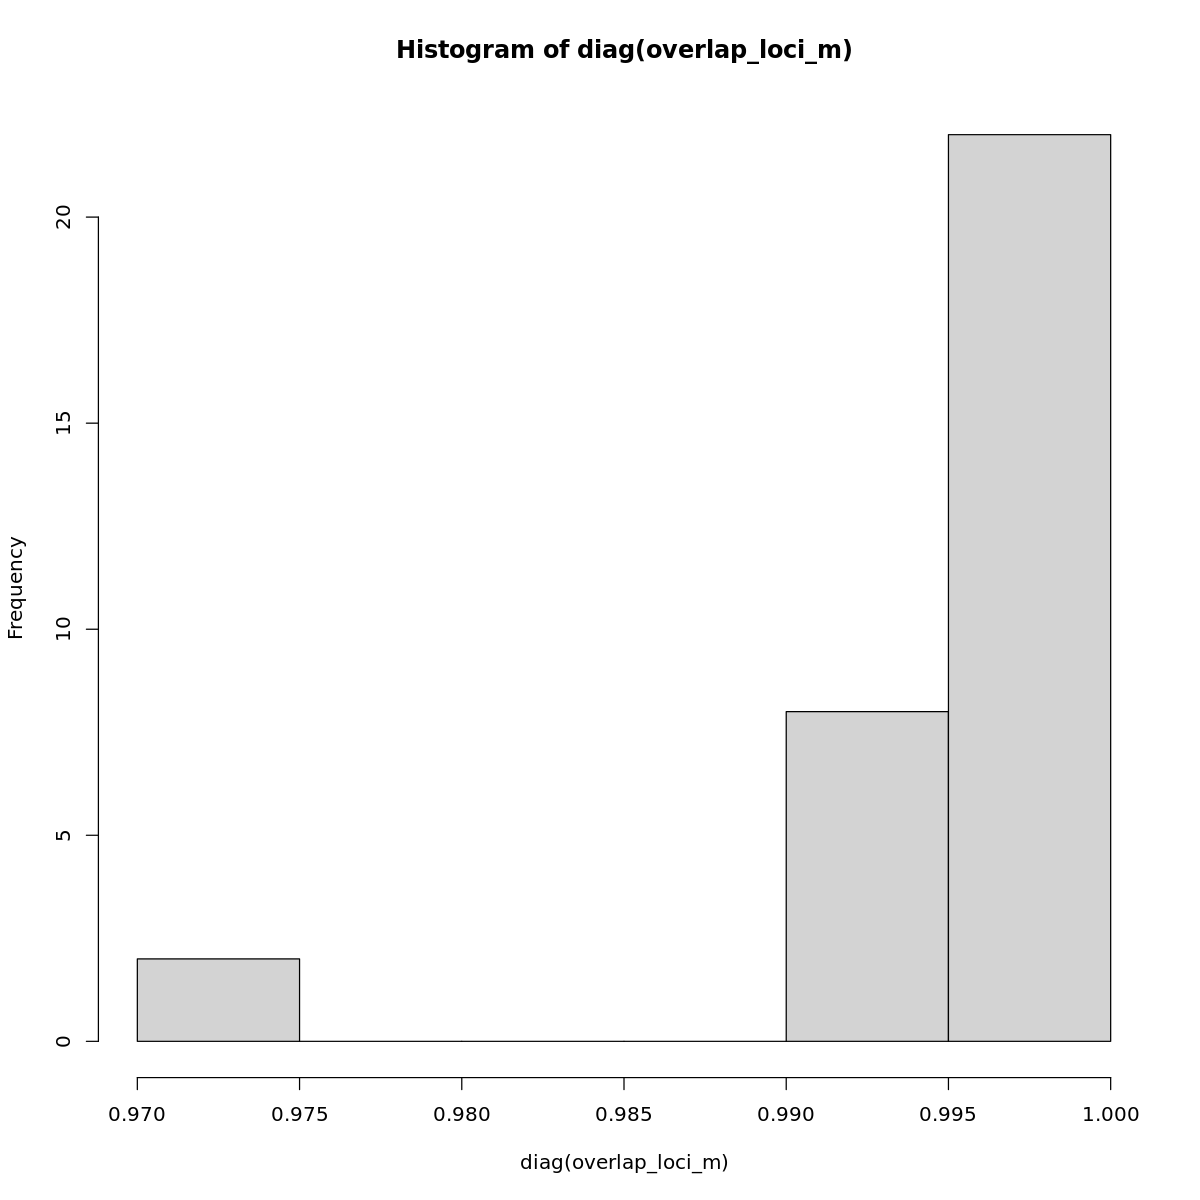

In [20]:
hist(diag(overlap_loci_m))

In [21]:
ads_m_df=as.data.frame(ads_m)

In [22]:
fwrite(ads_m_df, "~/data/TRD/ads_distance_matrix.csv")

In [23]:
remove(ads_m_df)

In [ ]:
loc <- cmdscale(1 - overlap_loci_m, k = 2, eig=TRUE)
x <- loc$points[, 1]; y <- loc$points[, 2]

source("scripts/MyTheme.R")

loc$GOF

options(repr.plot.width=6, repr.plot.height=6)



ggplot(mapping=aes(x,y,color=tab_still_in_data$`Cluster-tree`))+
geom_point()+
xlab("Dimension 1")+
ylab("Dimension 2")+
my_theme()

In [ ]:
library(ape)

GeneticDistance <- as.dist(1-ads_m_no_outliers)

options(repr.plot.width=10, repr.plot.height=10)



HC <- hclust(GeneticDistance, "ave")
phylo<-ape::bionjs(X = GeneticDistance)



In [ ]:
options(repr.plot.width=10, repr.plot.height=20)


plot.phylo(phylo, type="phylogram", tip.color=mycol)